<a href="https://colab.research.google.com/github/LeeSeungwon89/Deep-learning_Theory/blob/main/8-3%20%ED%95%A9%EC%84%B1%EA%B3%B1%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **8-3 합성곱 신경망의 시각화**

신경망이 이미지에서 어떤 것을 학습하는지 합성곱 층의 가중치와 특성 맵을 시각화하여 통해 확인해 보겠습니다.

## **가중치 시각화**

합성곱 층은 여러 필터를 사용하여 이미지에서 특징을 학습합니다. 각 필터는 커널이라 부르는 가중치와 절편을 가집니다. 절편은 시각적인 의미를 갖진 않지만 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 두드러지게 표현하는 역할을 가집니다. 예컨대 특정 필터가 이미지의 둥근 모서리에 도장을 찍었다면 어떤 특정 가중치는 둥근 모서리가 있는 영역에서는 크게 활성화되어 높은 값을 만들고 그렇지 않은 영역에서는 활성화되지 않은 낮은 값을 만듭니다. 이 높은 값을 토대로 둥근 모서리가 있는 입력과 곱해지면 큰 출력을 만듭니다.

이전 챕터에서 학습한 가중치를 확인하기 위해 체크포인트 파일을 읽어 보겠습니다. 먼저 저자의 깃허브에 저장된 `best-cnn-model.h5` 파일을 다운로드하겠습니다. 8-2 챕터에서 생성했던 코드를 가져와도 무관합니다.

In [4]:
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2022-09-10 08:11:47--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2022-09-10 08:11:47--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4049416 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5.1’

best-cnn-model.h5.1 100%[===================>]   3.86M  --.-KB/s    in 0.06s   

2022-09-10 08:11:47 (67.5 MB/s) - ‘best-cnn-model.h5.1’ saved [4049416/4049416]



체크포인트 파일을 읽어 보겠습니다.

In [6]:
from tensorflow import keras

model = keras.models.load_model('best-cnn-model.h5')

모델에 추가한 층을 확인해 보겠습니다. 모델의 `layers` 속성에 리스트 형식으로 저장되어 있습니다.

In [7]:
model.layers

먼저 처음 합성곱 층의 가중치를 확인하겠습니다. 가중치와 절편은 각 층의 `weights` 속성에 리스트 형식으로 저장되어 있습니다.

In [13]:
conv = model.layers[0]
# `weights[0]`은 가중치, `weights[1]`은 절편입니다.
print(conv.weights[0])
print(conv.weights[1])

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 2.24588048e-02,  5.65292537e-02, -8.52608621e-01,
           5.51108969e-03, -2.84124047e-01,  5.49770594e-02,
           1.42099485e-01, -1.35188410e-02, -5.56270957e-01,
          -1.61427796e-01, -1.63072810e-01,  7.48860016e-02,
          -1.97094038e-01,  3.74589069e-03,  1.17388563e-02,
           3.49008739e-01, -5.60458899e-01,  2.95836627e-01,
           6.69615567e-02, -7.12780356e-02,  4.99922745e-02,
           1.06703136e-02, -4.98783104e-02,  3.04090921e-02,
          -3.88760604e-02, -1.53872028e-01,  1.51755556e-01,
          -2.00085923e-01,  8.52966532e-02, -6.73547685e-02,
           8.74601901e-02, -2.06523493e-01]],

        [[ 1.73668079e-02,  2.76921540e-01,  1.56758521e-02,
          -1.38880894e-01,  2.31679767e-01,  1.31663650e-01,
          -6.39315844e-02,  4.06329334e-02, -5.02456963e-01,
           1.28005192e-01,  2.44174451e-01, -1.98248819e-01,
           2.77268946e-01,

커널 크기는 (3, 3)이고 입력 깊이는 1이므로 실제 커널 크기는 (3, 3, 1)이며, 필터 개수는 32개이므로 (3, 3, 1, 32)입니다. 아울러 필터 개수에 따라 절편은 32개이므로 (32,)입니다.

속성 `weights`를 다루기 쉽도록 넘파이 배열로 변환하고 가중치의 평균과 표준편차를 산출하고 추후에 훈련 전의 가중치와 비교하겠습니다.

In [15]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.021033935 0.23466988


가중치의 분포를 확인하기 위해 히스토그램을 그려 보겠습니다.

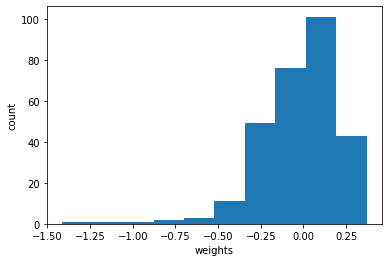

In [19]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

종 모양 형태를 띕니다. 가중치가 무엇을 학습했는지 추후에 훈련 전의 가중치와 비교해 보겠습니다.

커널 32개를 16개씩 두 줄로 나타내 보겠습니다. 커널 32개는 가중치 32개와 같은 의미입니다.

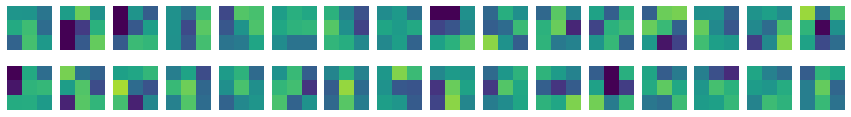

In [20]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()



---

작업 중

---



## **함수형 API**

## **특성맵 시각화**